# Matplotlib 실습

In [1]:
data1 = './data/house_price.csv'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

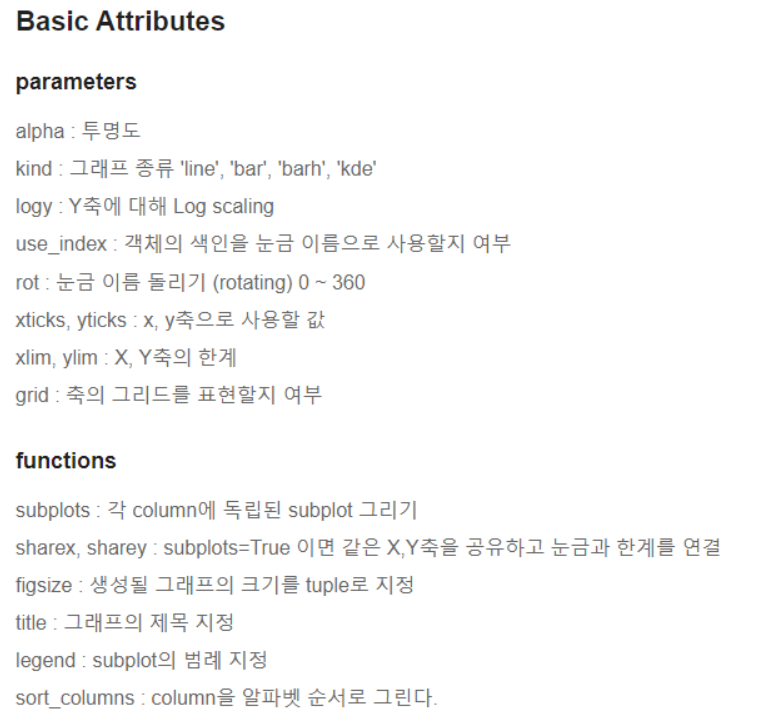

In [3]:
from IPython import display
display.Image('./data/attributes.png')

<AxesSubplot: >

c:\Users\admin\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\admin\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
c:\Users\admin\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
c:\Users\admin\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
c:\Users\admin\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  func(*args, **kwargs)
c:\Users\admin\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from

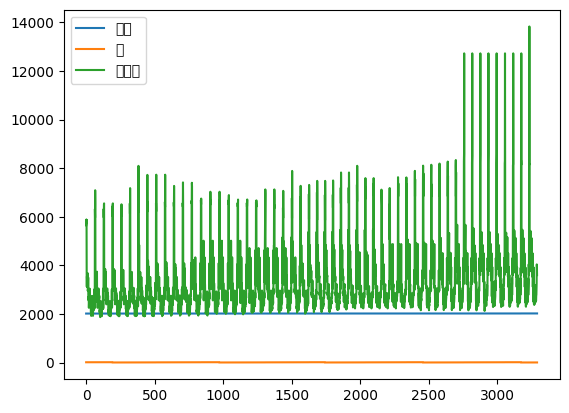

In [4]:
df = pd.read_csv(data1)
df.plot()

In [5]:
# 한글 폰트 깨짐
from matplotlib import font_manager, rc
font_fname = 'C:/windows/fonts/HANBatang.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

<AxesSubplot: >

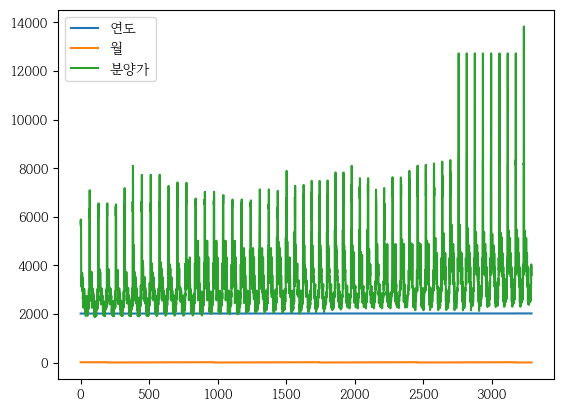

In [6]:
df = pd.read_csv(data1)
df.plot()

# DataFrame을 활용한 시각화

kind 옵션:
   - line   : 선 그래프
   - bar    : 바 그래프
   - barh   : 수평 바 그래프
   - hist   : 히스토그램
   - kde    : 커널 밀도 그래프
   - hexbin : 고밀도 산점도 그래프
   - box    : 박스 플롯
   - area   : 면적 그래프
   - pie    : 파이 그래프
   - scatter: 산덤도 그래프

In [7]:
# line 그래프
from IPython.core.interactiveshell import InteractiveShell

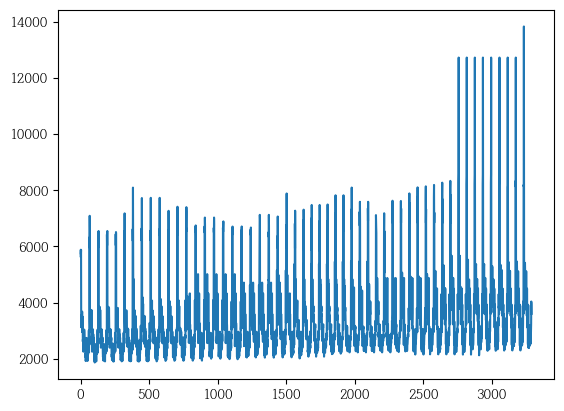

In [8]:
type(df['분양가'])
df['분양가'].plot(kind = 'line');

<AxesSubplot: >

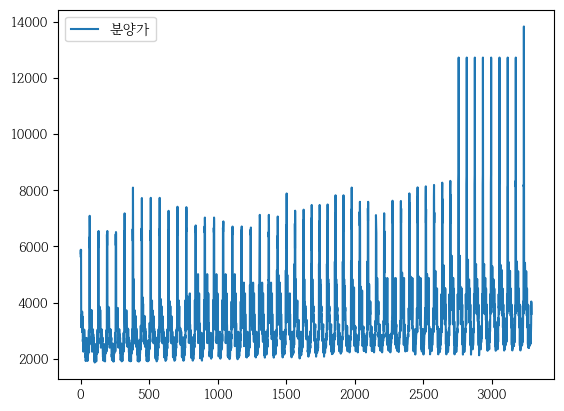

In [9]:
pd.DataFrame(df['분양가']).plot(y='분양가', kind = 'line')

In [10]:
df_seoul = df.loc[df['지역']=='서울']
df_seoul

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3178,서울,102㎡초과,2020,1,8779
3234,서울,60㎡이하,2020,2,8193
3235,서울,60㎡초과 85㎡이하,2020,2,8140
3236,서울,85㎡초과 102㎡이하,2020,2,13835


In [11]:
df_seoul_year = df_seoul.groupby('연도').mean()
df_seoul_year

C:\Users\admin\AppData\Local\Temp\ipykernel_968\1101262646.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_seoul_year = df_seoul.groupby('연도').mean()


,월,분양가
연도,,
2015,11.0,6201.000000
2016,6.5,6674.520833
2017,6.5,6658.729167
2018,6.5,7054.687500
2019,6.5,8735.083333
2020,1.5,9647.375000


<AxesSubplot: xlabel='연도'>

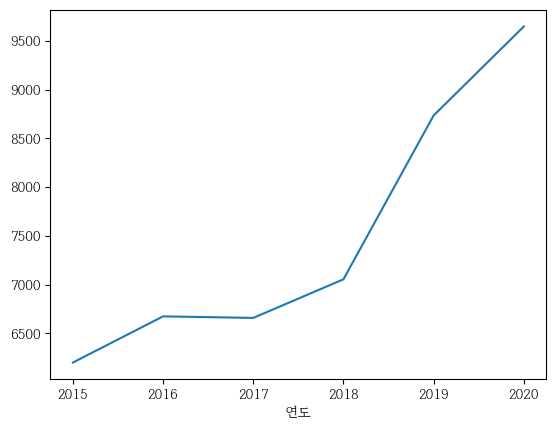

In [12]:
df_seoul_year['분양가'].plot(kind='line')

In [13]:
# bar 그래프
df.groupby('지역')['분양가'].mean()

지역
강원    2448.156863
경기    4133.952830
경남    2858.932367
경북    2570.465000
광주    3055.043750
대구    3679.620690
대전    3176.127389
부산    3691.981132
서울    7308.943396
세종    2983.543147
울산    2990.373913
인천    3684.302885
전남    2326.250000
전북    2381.416268
제주    3472.677966
충남    2534.950000
충북    2348.183962
Name: 분양가, dtype: float64

<AxesSubplot: xlabel='지역'>

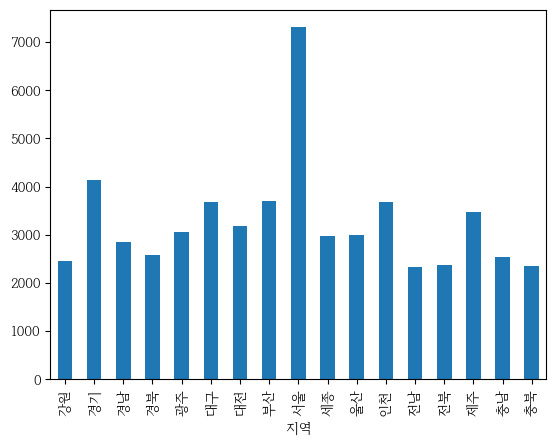

In [14]:
df.groupby('지역')['분양가'].mean().plot(kind='bar')

<AxesSubplot: ylabel='지역'>

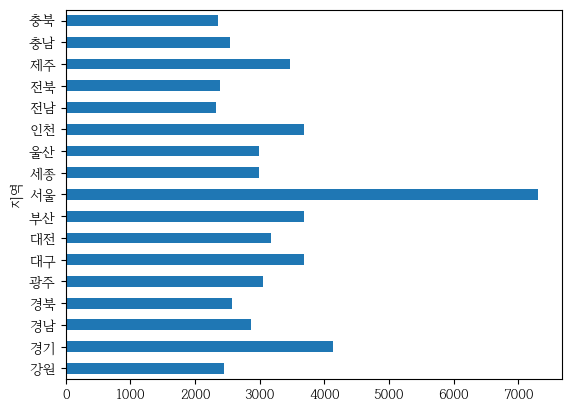

In [15]:
df.groupby('지역')['분양가'].mean().plot(kind='barh')

<AxesSubplot: ylabel='Frequency'>

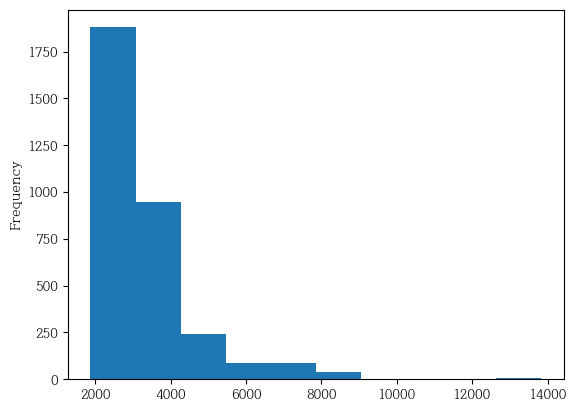

In [16]:
# 히스토그램 (hist)

df['분양가'].plot(kind='hist')

<AxesSubplot: ylabel='Density'>

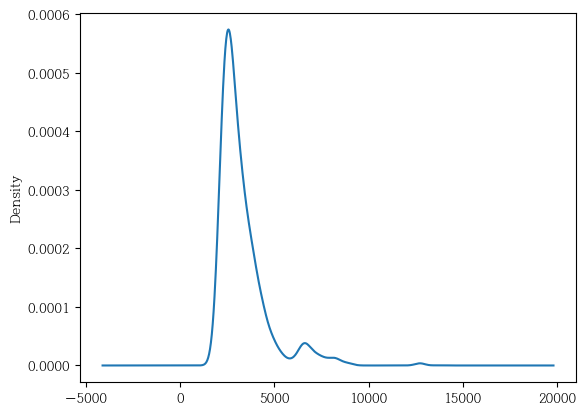

In [17]:
# 커널 밀도 그래프
df['분양가'].plot(kind='kde')

# Hexbin
- hexbin은 고밀도 산점도 그래프입니다.
- x와 y 키 값을 넣어 주어야 합니다.
- x, y 값 모두 numeric 한 값을 넣어 주어야합니다.
- 데이터의 밀도를 추정합니다.

<AxesSubplot: xlabel='분양가', ylabel='연도'>

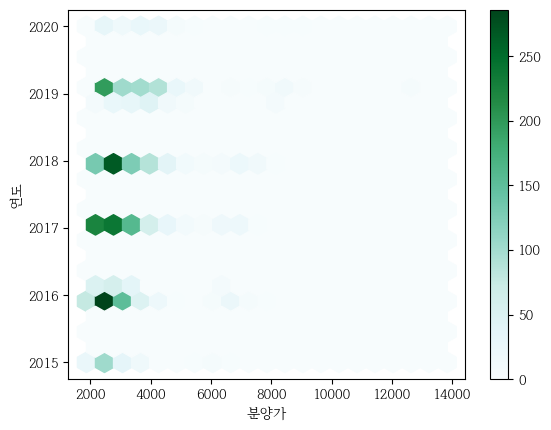

In [18]:
df.plot(kind='hexbin', x='분양가', y='연도', gridsize=20)

<AxesSubplot: >

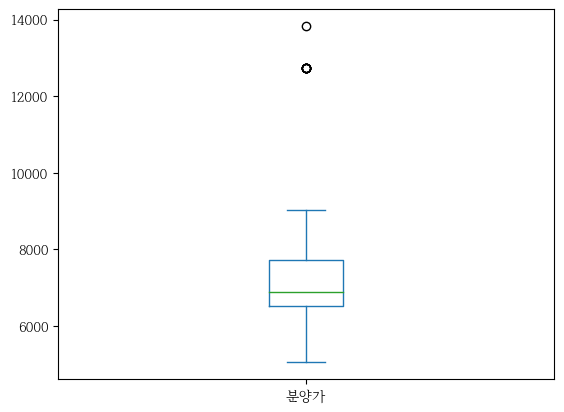

In [19]:
# 박스 플롯(box)
df_seoul = df.loc[df['지역'] == '서울']
df_seoul['분양가'].plot(kind='box')

In [20]:
# Pie 그래프
df1=df.groupby('연도')['분양가'].count()
df2=pd.DataFrame(df1)
df2

,분양가
연도,
2015,192
2016,780
2017,771
2018,716
2019,716
2020,118


<AxesSubplot: ylabel='분양가'>

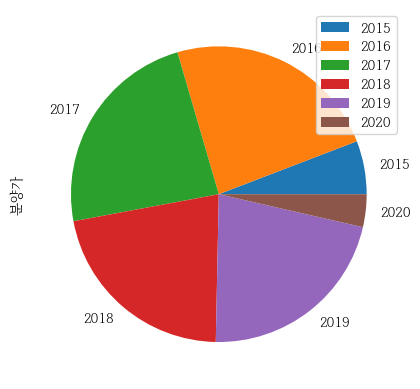

In [21]:
df2.plot(y='분양가', kind='pie')

# scatter plot (산점도 그래프)
- 점으로 데이터를 표기해 줍니다
- x, y 값을 넣어주어야합니다 (hexbin과 유사)
- x축과 y축을 지정해주면 그에 맞는 데이터 분포도를 볼 수 있습니다.
- 역시 numeric 한 column 만 지정할 수 있습니다


In [22]:
df

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488
...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065
3289,경남,85㎡초과 102㎡이하,2020,2,3247
3290,제주,60㎡이하,2020,2,4039
3291,제주,60㎡초과 85㎡이하,2020,2,3962


<AxesSubplot: xlabel='월', ylabel='분양가'>

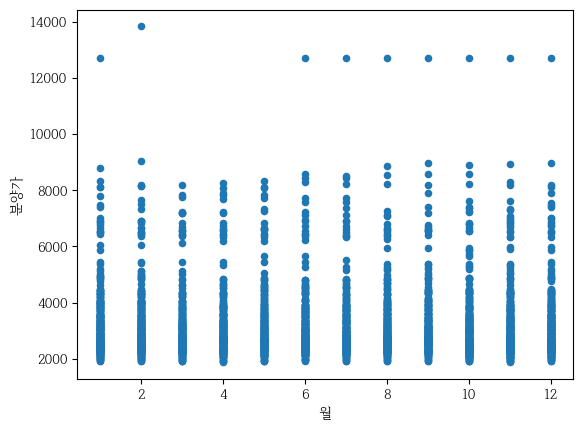

In [23]:
df.plot(x='월', y='분양가', kind='scatter')

# Pandas의 시각화 기능

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 한글 깨짐 방지
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

np.random.seed(0)
df1 = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2018', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
df1.tail()

,A,B,C
2018-04-06,9.396256,6.282026,-11.198087
2018-04-07,10.086074,7.583872,-11.826175
2018-04-08,9.605047,9.887789,-12.886190
2018-04-09,9.469097,11.024680,-12.788465
2018-04-10,10.052051,10.625231,-12.418409


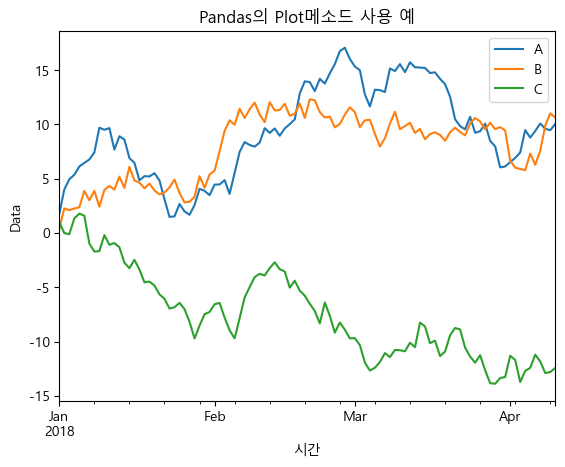

In [25]:
df1.plot()
plt.title("Pandas의 Plot메소드 사용 예")
plt.xlabel("시간")
plt.ylabel("Data")
plt.show()

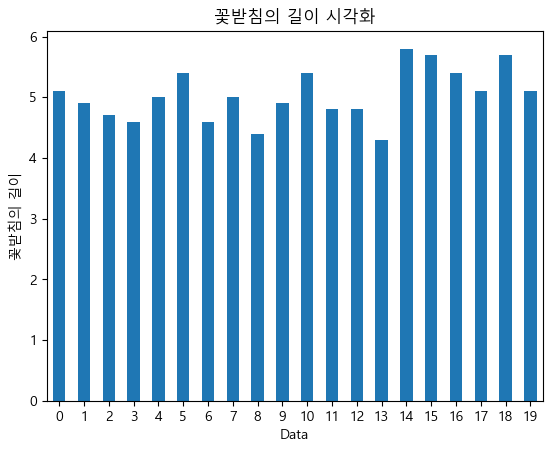

In [26]:
import seaborn as sns
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터

iris.sepal_length[:20].plot(kind='bar', rot=0)
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이")
plt.show()

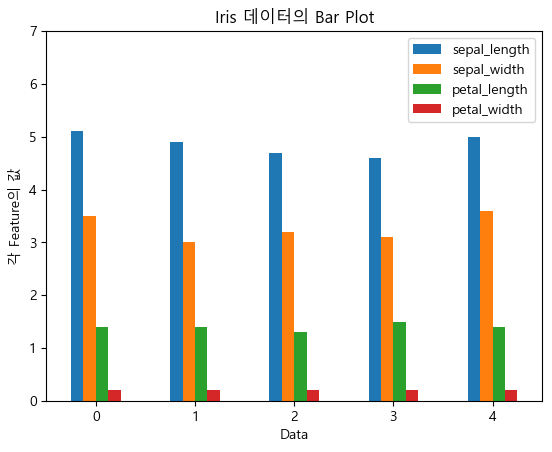

In [27]:
iris[:5].plot.bar(rot=0) # rot: 눈금 이름 돌리기 (rotating) 0 ~ 360
plt.title("Iris 데이터의 Bar Plot")
plt.xlabel("Data")
plt.ylabel("각 Feature의 값")
plt.ylim(0, 7)
plt.show();

In [28]:
df2 = iris.groupby(iris.species).mean()
df2.columns.name = "feature"
df2

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


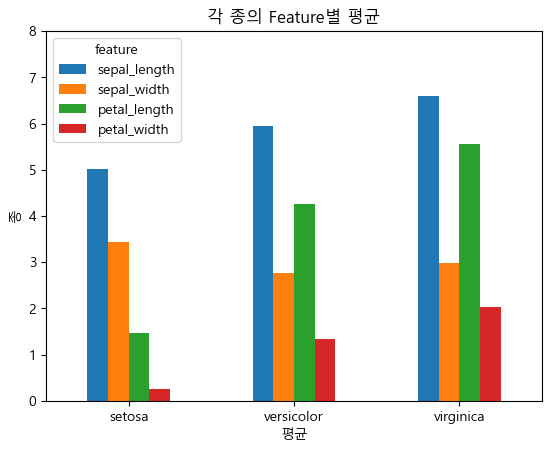

In [29]:
df2.plot.bar(rot=0)
plt.title("각 종의 Feature별 평균")
plt.xlabel("평균")
plt.ylabel("종")
plt.ylim(0, 8)
plt.show();

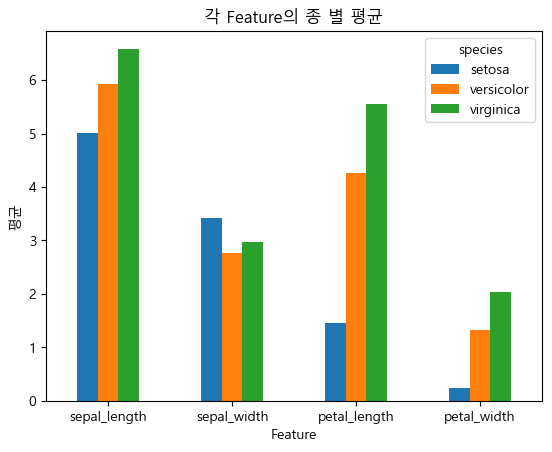

In [30]:
df2.T.plot.bar(rot=0)
plt.title("각 Feature의 종 별 평균")
plt.xlabel("Feature")
plt.ylabel("평균")
plt.show();

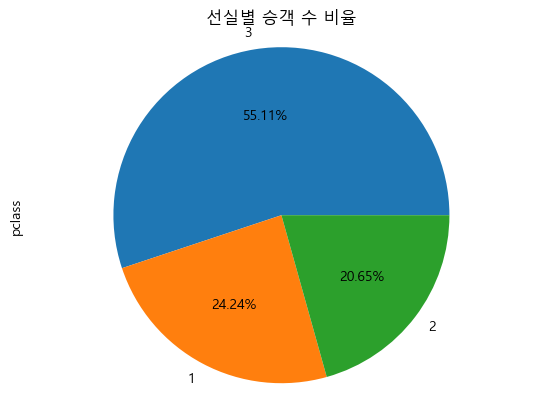

In [31]:
df3 = titanic.pclass.value_counts()
df3.plot.pie(autopct='%.2f%%')
plt.title("선실별 승객 수 비율")
plt.axis('equal') # equal 축의 비율 맞추기
plt.show();

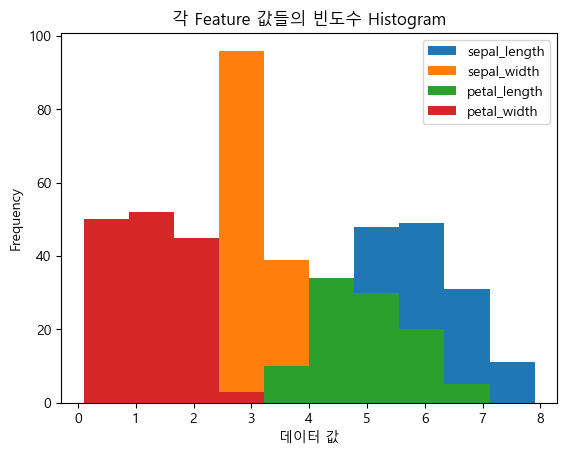

In [32]:
iris.plot.hist()
plt.title("각 Feature 값들의 빈도수 Histogram")
plt.xlabel("데이터 값")
plt.show();

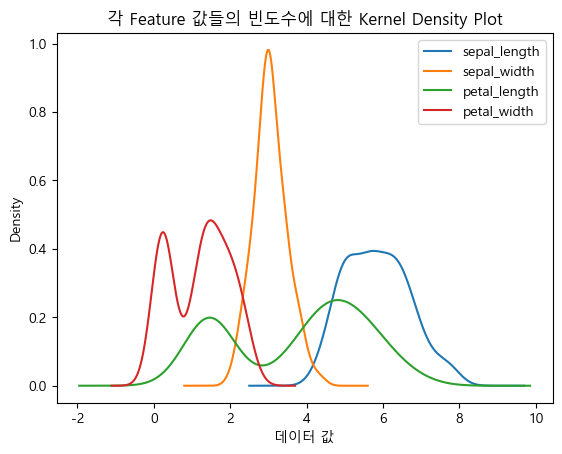

In [33]:
iris.plot.kde()
plt.title("각 Feature 값들의 빈도수에 대한 Kernel Density Plot")
plt.xlabel("데이터 값")
plt.show();

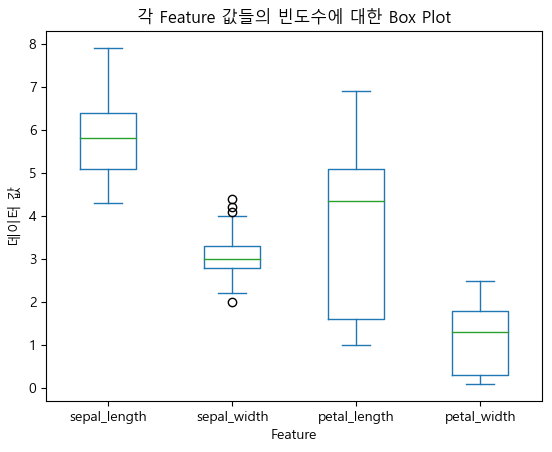

In [34]:
iris.plot.box()
plt.title("각 Feature 값들의 빈도수에 대한 Box Plot")
plt.xlabel("Feature")
plt.ylabel("데이터 값")
plt.show();

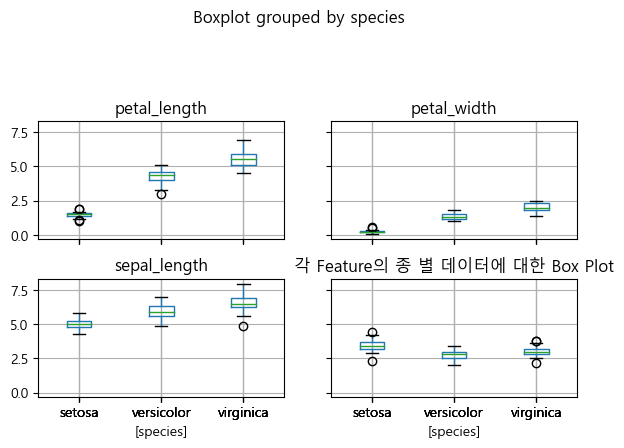

In [35]:
iris.boxplot(by='species')
plt.tight_layout(pad=3, h_pad=1)  #tight_layout  subplot간의 간격 벌리기
plt.title("각 Feature의 종 별 데이터에 대한 Box Plot")
plt.show();

<AxesSubplot: >

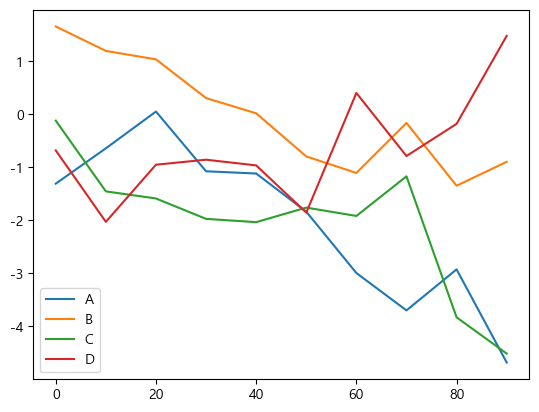

In [36]:
# 선그래프
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(10, 4).cumsum(axis=0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))

df.plot()

In [37]:
# 막대 그래프
df = pd.DataFrame(np.random.rand(6, 4),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.360546,0.828657,0.924967,0.046007
two,0.232627,0.348519,0.814966,0.985491
three,0.968972,0.904948,0.296556,0.992011
four,0.249420,0.105906,0.950953,0.233420
five,0.689768,0.058356,0.730709,0.881720
six,0.272437,0.379057,0.374296,0.748788


<AxesSubplot: >

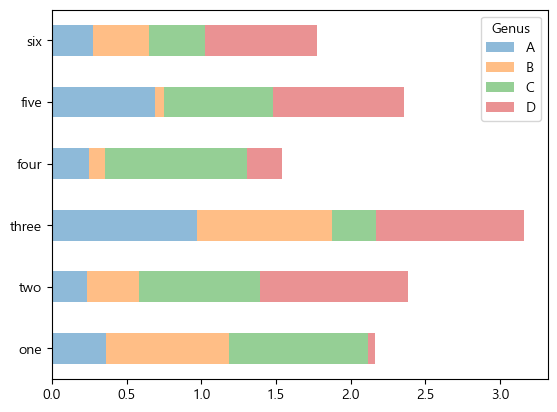

In [38]:
df.plot.barh(stacked=True, alpha=0.5)

In [39]:
tips = pd.read_csv("./data/tips.csv")

# crosstab - 빈도표
# day별로 size의 빈도를 구함
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [40]:
party_counts = party_counts.loc[:, 2:5]
party_pct = party_counts.div(party_counts.sum(1), axis=0)
party_pct

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


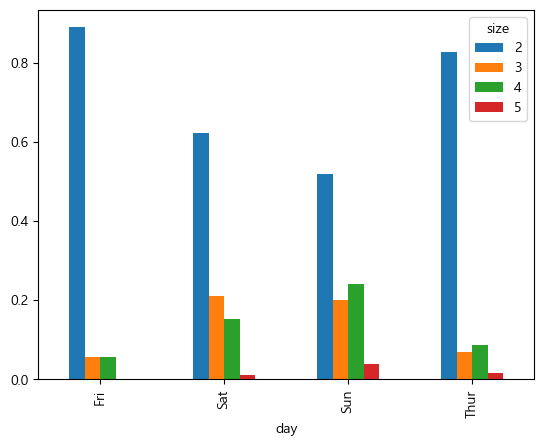

In [41]:
party_pct.plot.bar();

In [42]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<AxesSubplot: xlabel='tip_pct', ylabel='day'>

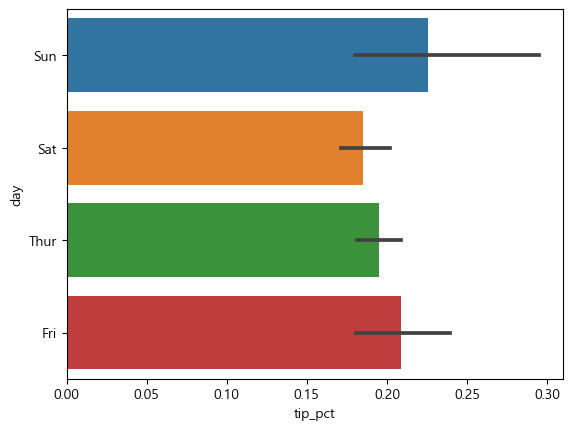

In [43]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

<AxesSubplot: xlabel='tip_pct', ylabel='day'>

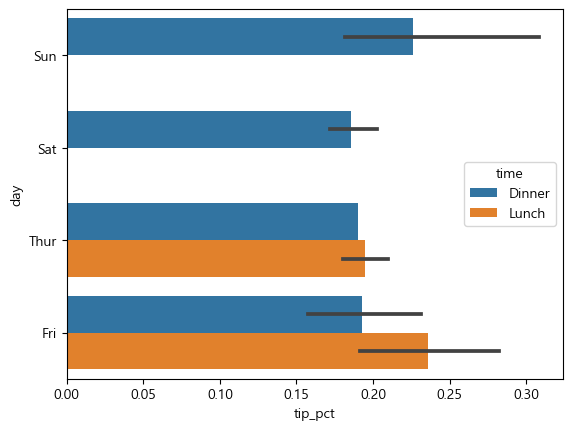

In [44]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

<AxesSubplot: ylabel='Density'>

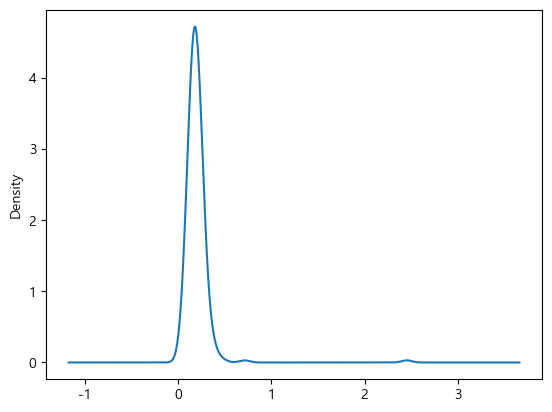

In [45]:
# 히스토그램과 밀도 그래프
# 연속된 확률 분포를 그림 ( 커널 밀도 추정)
tips["tip_pct"].plot.density()

C:\Users\admin\AppData\Local\Temp\ipykernel_968\4142298526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, bins=100, color="k");


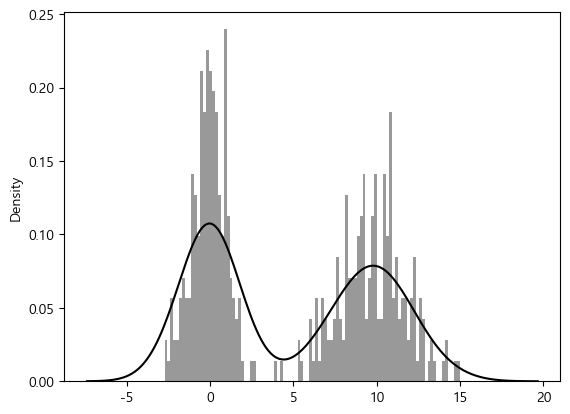

In [46]:
import warnings
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color="k");
warnings.filterwarnings(action='ignore')

In [47]:
# 산포도
macro = pd.read_csv("./data/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

# 이전 행과의 차이를 계산 후 NaN값이 되는 행 (이전 행이 존재 X)은 삭제
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


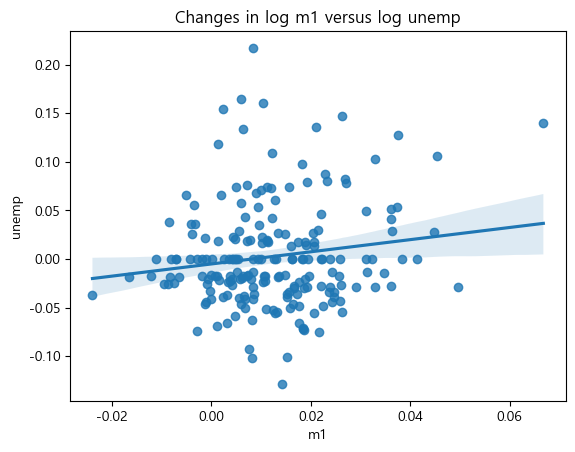

In [48]:
import matplotlib.pyplot as plt
sns.regplot(x = "m1", y = "unemp", data=trans_data)
plt.title("Changes in log %s versus log %s" % ("m1", "unemp"));

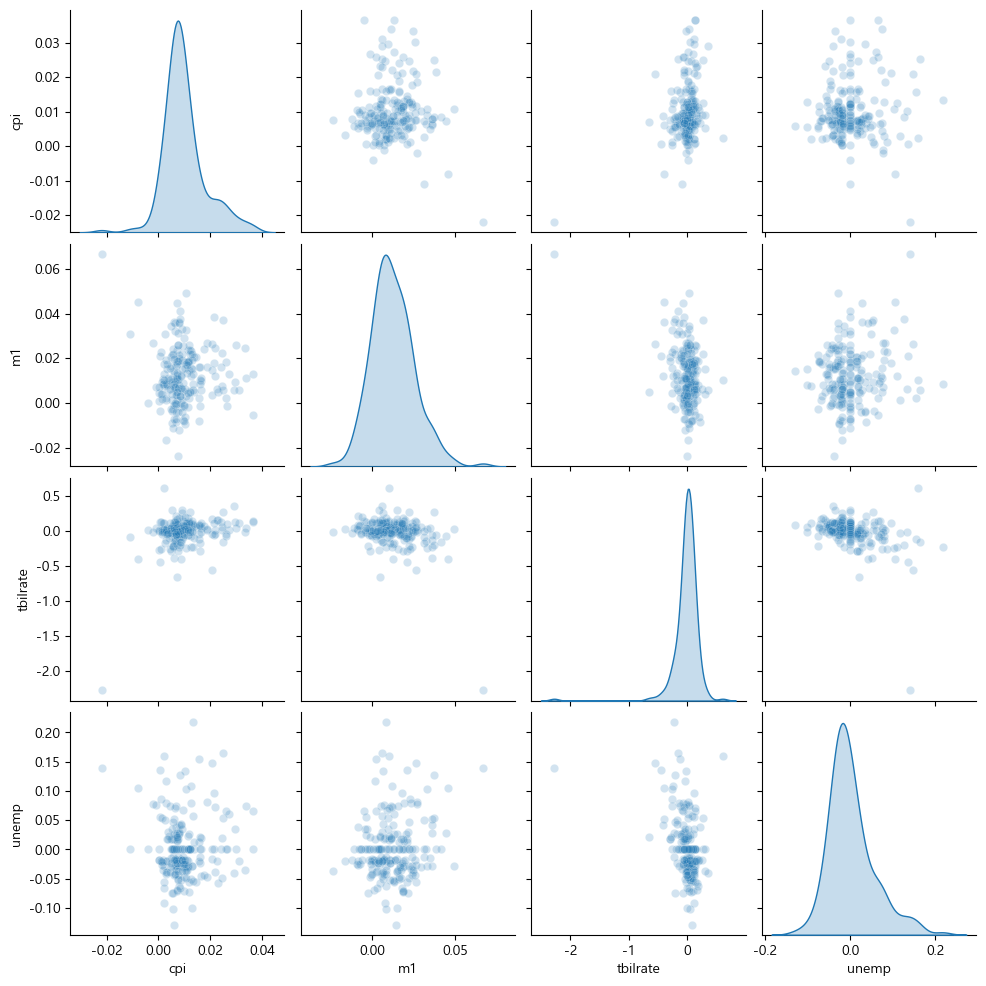

In [49]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha":0.2})
# diag_kind=hist도 가능

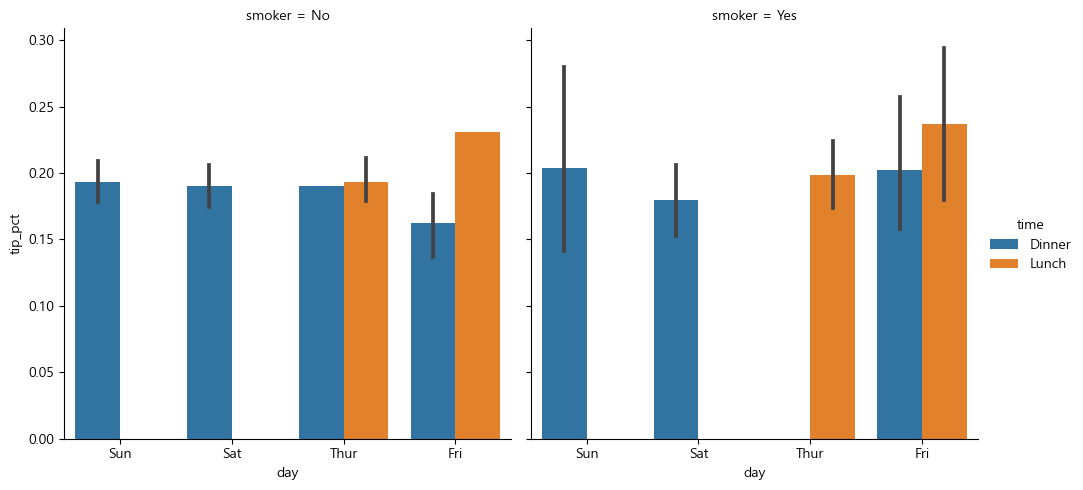

In [50]:
# 패싯 그리드와 범주형 데이터
# 패싯 그리드 - 다양한 범주형 값을 가지는 데이터를 시각화하는 방법
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

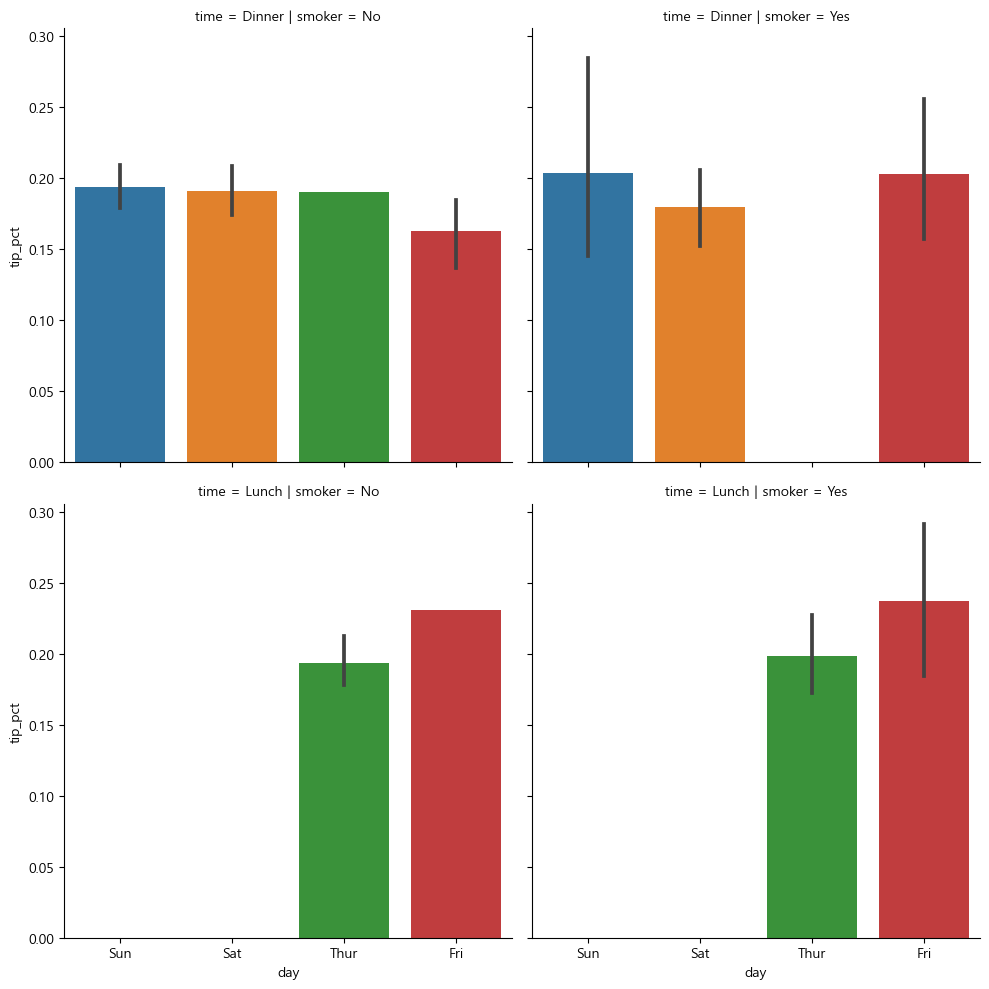

In [51]:
sns.catplot(x="day", y="tip_pct", row="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

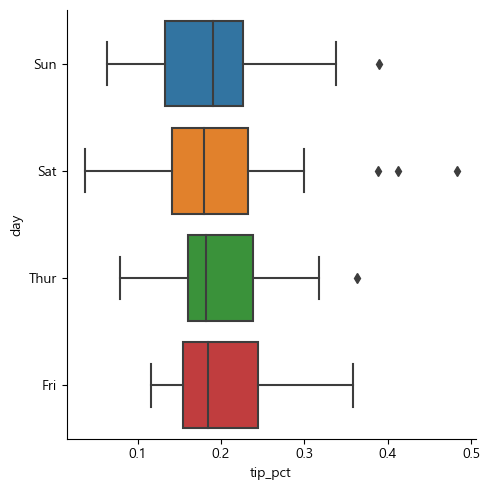

In [52]:
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5])